Functions defined!
key:  b'\xc4T\x05\xb3\xb6\xba\xcc\xcb^\xa9\xa5\x11F&\xc9\x99'

---  encrypt_image_ecb  ----
[ENCRYPT] Initial len 249630
[ENCRYPT] Padding len 2
    [DOT] b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff..'
    [PAD] b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x02\x02'
[ENCRYPT] Len of encrypted image bytes 249630

---  decrypt_image_ecb  ----
[DECRYPT] Len of encrypted image bytes 249630 beginning of decrypt
[DECRYPT] Padding len len 2
[DECRYPT] Final len decrypted bytes 249632

---  enc_dec_image_ecb  ----
[ENC_DEC] Len of encrypted image bytes 249630 beginning of decrypt
[ENC_DEC] Len of encrypted image bytes 249632
[ENC_DEC] Final len decrypted bytes 249632
[ENC_DEC] Final len decrypted unpaded bytes 249630


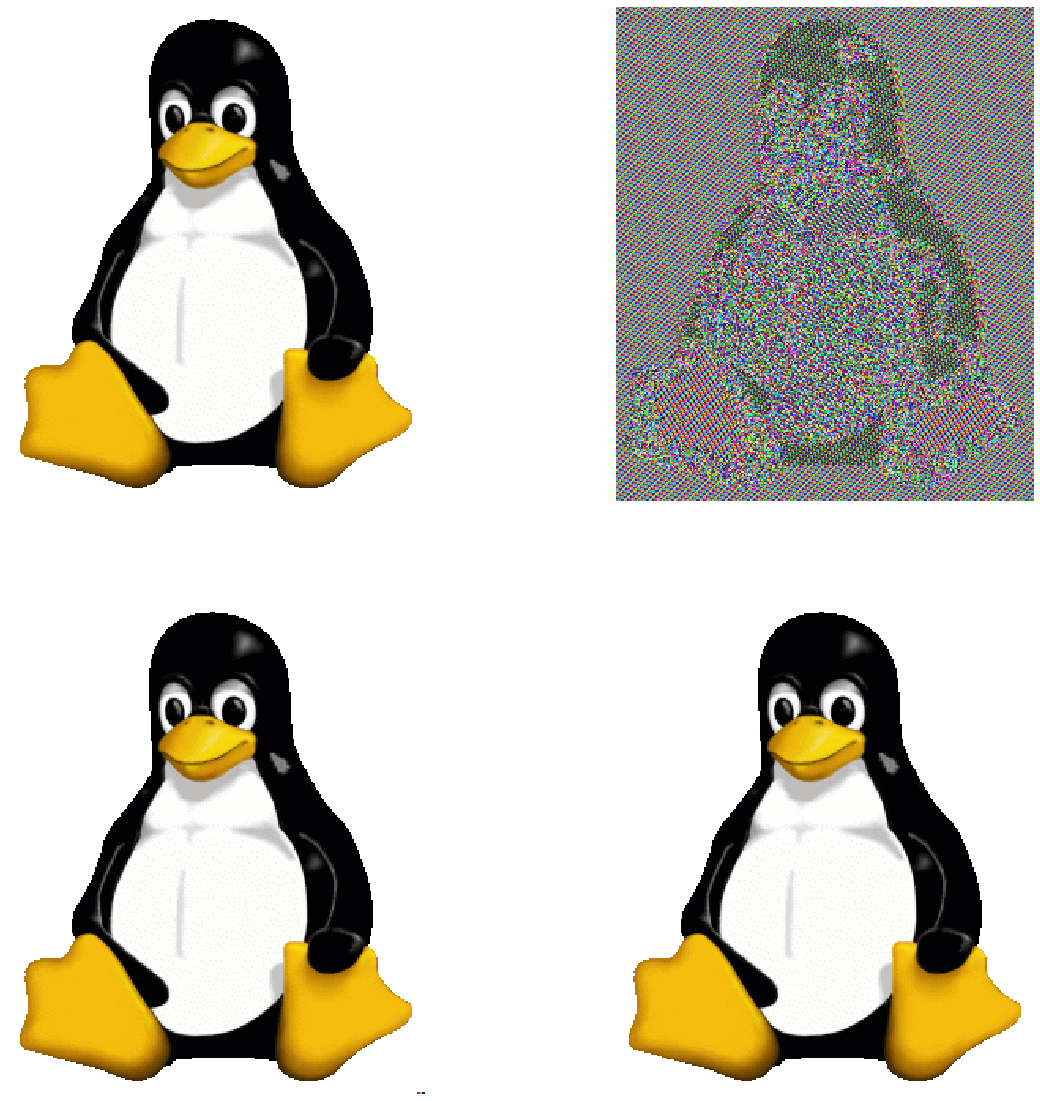

In [1]:
from PIL import Image
from argparse import ArgumentParser
import matplotlib.pyplot as plt

from Crypto.Cipher import AES
from Crypto import Random
from Crypto.Util.Padding import pad, unpad



def encrypt_image_ecb(image, key):
    image_array    = image.tobytes()
    
    print(f'[ENCRYPT] Initial len {len(image_array)}')
    
    padding_length = AES.block_size - len(image_array) % AES.block_size
    
    print(f'[ENCRYPT] Padding len {padding_length}')
    
    image_array_dotted = image_array + bytes(padding_length * ".", "UTF-8") # Just an arbitrary padding byte

    image_array_padded = pad(image_array, AES.block_size)
    
    print(f'    [DOT] {image_array_dotted [-AES.block_size:]}')
    print(f'    [PAD] {image_array_padded [-AES.block_size:]}')
    
    
    mode   = AES.MODE_ECB
    aes    = AES.new(key, mode)

    encrypted_image = aes.encrypt(image_array_padded)
    encrypted_image = encrypted_image[:-padding_length]


    print(f'[ENCRYPT] Len of encrypted image bytes {len(encrypted_image)}')

    return Image.frombytes("RGB", image.size, encrypted_image, "raw", "RGB")



def decrypt_image_ecb(image, key, iv=b''):
    image_array = image.tobytes()
    
    print(f'[DECRYPT] Len of encrypted image bytes {len(image_array)} beginning of decrypt')
    
    padding_length = AES.block_size - len(image_array) % AES.block_size
    image_array += bytes(padding_length * ".", "UTF-8") # Just an arbitrary padding byte

    
    print(f'[DECRYPT] Padding len len {padding_length}')

    mode   = AES.MODE_ECB
    aes    = AES.new(key, mode)

    decrypted_image = aes.decrypt(image_array)
    #decrypted_image = decrypted_image[:-padding_length]
    
    print(f'[DECRYPT] Final len decrypted bytes {len(decrypted_image)}')

    return Image.frombytes("RGB", image.size, decrypted_image, "raw", "RGB")




def enc_dec_image_ecb(image, key, iv=b''):
    image_array = image.tobytes()
    
    print(f'[ENC_DEC] Len of encrypted image bytes {len(image_array)} beginning of decrypt')
    

    image_array_padded = pad(image_array, AES.block_size)

    
    mode   = AES.MODE_ECB
    aes    = AES.new(key, mode)

    encrypted_image = aes.encrypt(image_array_padded)
    # we should never modify the encrypted data, otherwise integrity issues are introduced    
    
    

    print(f'[ENC_DEC] Len of encrypted image bytes {len(encrypted_image)}')
    
    decrypted_image = aes.decrypt(encrypted_image)
    
    print(f'[ENC_DEC] Final len decrypted bytes {len(decrypted_image)}')
    
    decrypted_image_unpadded = unpad(decrypted_image, AES.block_size)

    print(f'[ENC_DEC] Final len decrypted unpaded bytes {len(decrypted_image_unpadded)}')

    return Image.frombytes("RGB", image.size, decrypted_image_unpadded, "raw", "RGB")



print('Functions defined!')


# This is the original image, to be encrypted with AES in both Modes: ECB and CBC
#AES - CBC ECB
image = Image.open('res/penguin.png').convert('RGBA').convert('RGB') 


#Generate Random AES key 
key = Random.new().read(AES.key_size[0])

print(f'key:  {key}')

print('\n---  encrypt_image_ecb  ----')



ecb_penguin = encrypt_image_ecb(image, key)
ecb_penguin.save('output/penguin_ecb.png')


print('\n---  decrypt_image_ecb  ----')

ecb_dec_penguin = decrypt_image_ecb(ecb_penguin, key)
ecb_dec_penguin.save('output/penguin_ecb_dec.png')



print('\n---  enc_dec_image_ecb  ----')

correct_image = enc_dec_image_ecb(image, key)
correct_image.save('output/penguin_correct.png')


f, axarr = plt.subplots(2,2, figsize=(20,20))

axarr[0,0].imshow(image)
axarr[0,1].imshow(ecb_penguin)
axarr[1,0].imshow(ecb_dec_penguin)
axarr[1,1].imshow(correct_image)


for ax in axarr:
    for a in ax:
        a.axis('off')

